In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv(r'C:\Users\rjhcl\Desktop\temperature forcast\temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
# lets replace the null in the station column to next day
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

C:\Users\rjhcl\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
# lets replace null values in Date columns with next date of 30-08-2017
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [8]:
# lets drop latitude and longititude as it indicates geographical conditions
df.drop(columns = ['lat','lon'], inplace = True)

In [9]:
# lets replace all the null values with median of that column
for col in df.columns:
    if col not in ['station','Date']:
        df[col] = df[col].replace(np.nan, df[col].median())

In [10]:
# lets check the null values again

In [11]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
# now we have no null values in the data set

In [13]:
# lets convert data type of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# lets check the correlation

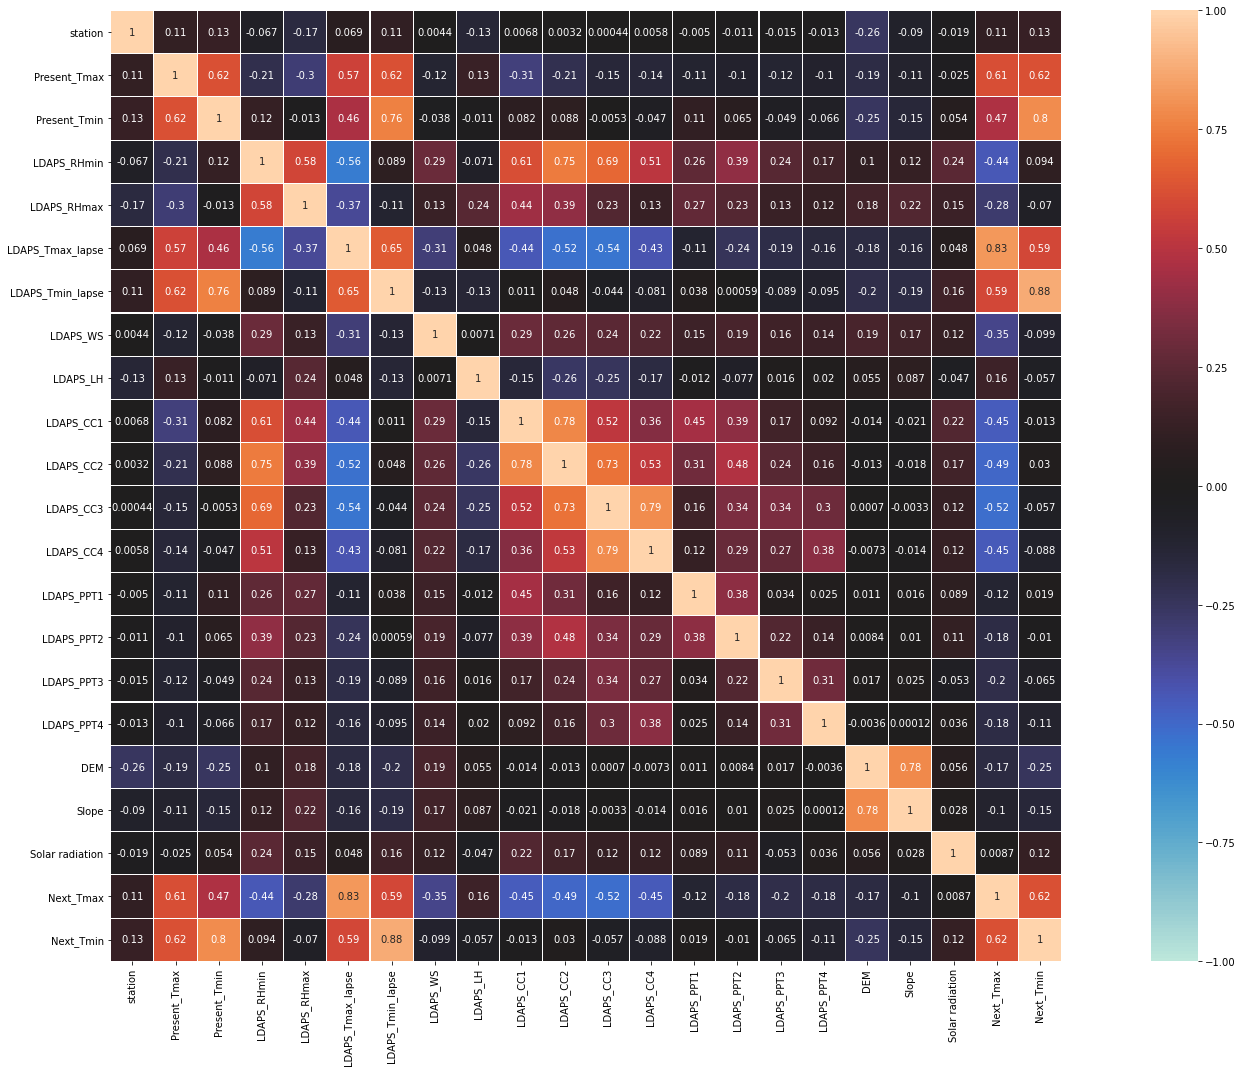

In [15]:
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

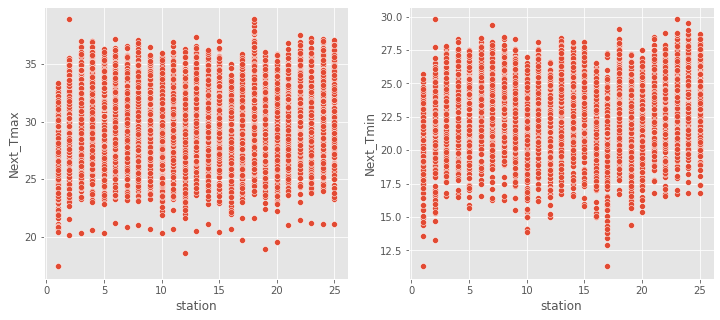

In [16]:
# scatterplot for station vs Next day maximum temperature and Next day minimum temperature
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'station', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'station', y = 'Next_Tmin', data = df)
plt.show()

#### from the above plots we can say that the relation between our target variables and station is not that strong

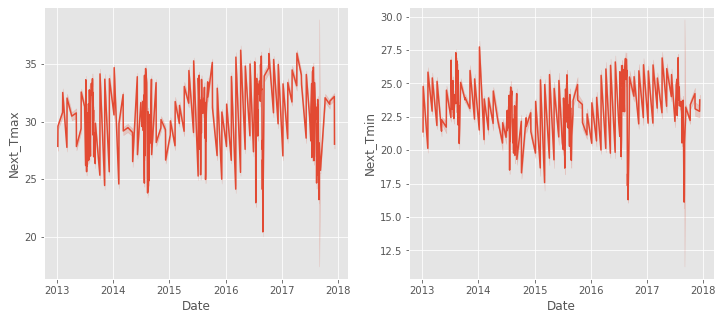

In [18]:
# lets plot lineplot for Date vs Next day temperature max and Next day temperature min
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.lineplot(x = 'Date', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.lineplot(x = 'Date', y = 'Next_Tmin', data = df)
plt.show()

#### from the above plot we can see that Date vs Next_Tmax and Next_Tmin, it seems like there is a small drop in temperature in both the cases between 2016 to 2017 and 2017 to 2018 is observed

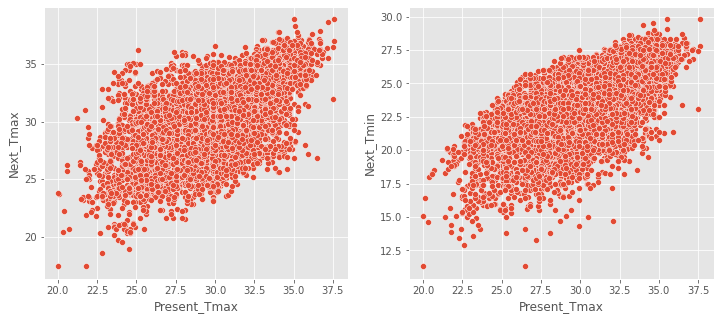

In [19]:
# scatterplots for Present day temperature max vs Next day temperature max and Next day temperature min
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmax', y = 'Next_Tmin', data = df)
plt.show()

#### from the above plot we can see that there is a strong relationhip between Present day max temperature with Next day min temperature compared to with Next day temperature max

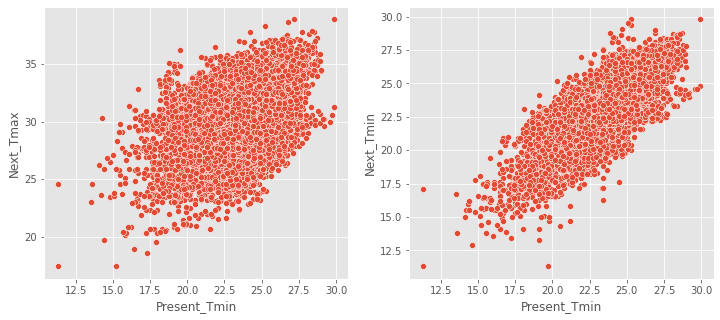

In [20]:
# lets plot scatterplot for Present day min temp vs Next day max temp and Next day min temp
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmax', data = df)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'Present_Tmin', y = 'Next_Tmin', data = df)
plt.show()

#### from the above plot we can observe that Present day min temp is strongly related with Next day min temp than with Next day max temp

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


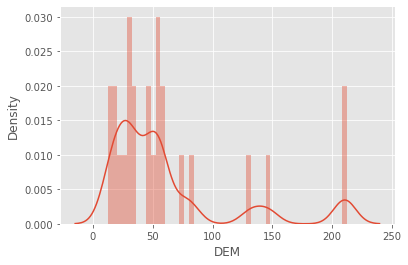

In [21]:
# lets have a look on destribution of DEM
sns.distplot( df['DEM'])
plt.show()

#### DEM represents the Elevation in meters, we can see most of the stations have elevation of 10 upto 80 meters.

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


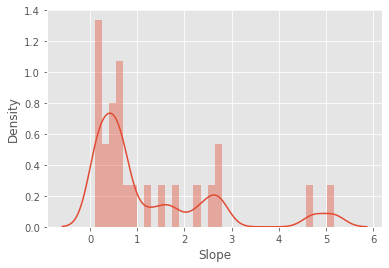

In [22]:
# lets check the distribution of slope
sns.distplot(df['Slope'])
plt.show()

#### This plot will tell us the slope is mostly destributed between 0.1 to 3.0

C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rjhcl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rjhcl\anaconda3\lib\si

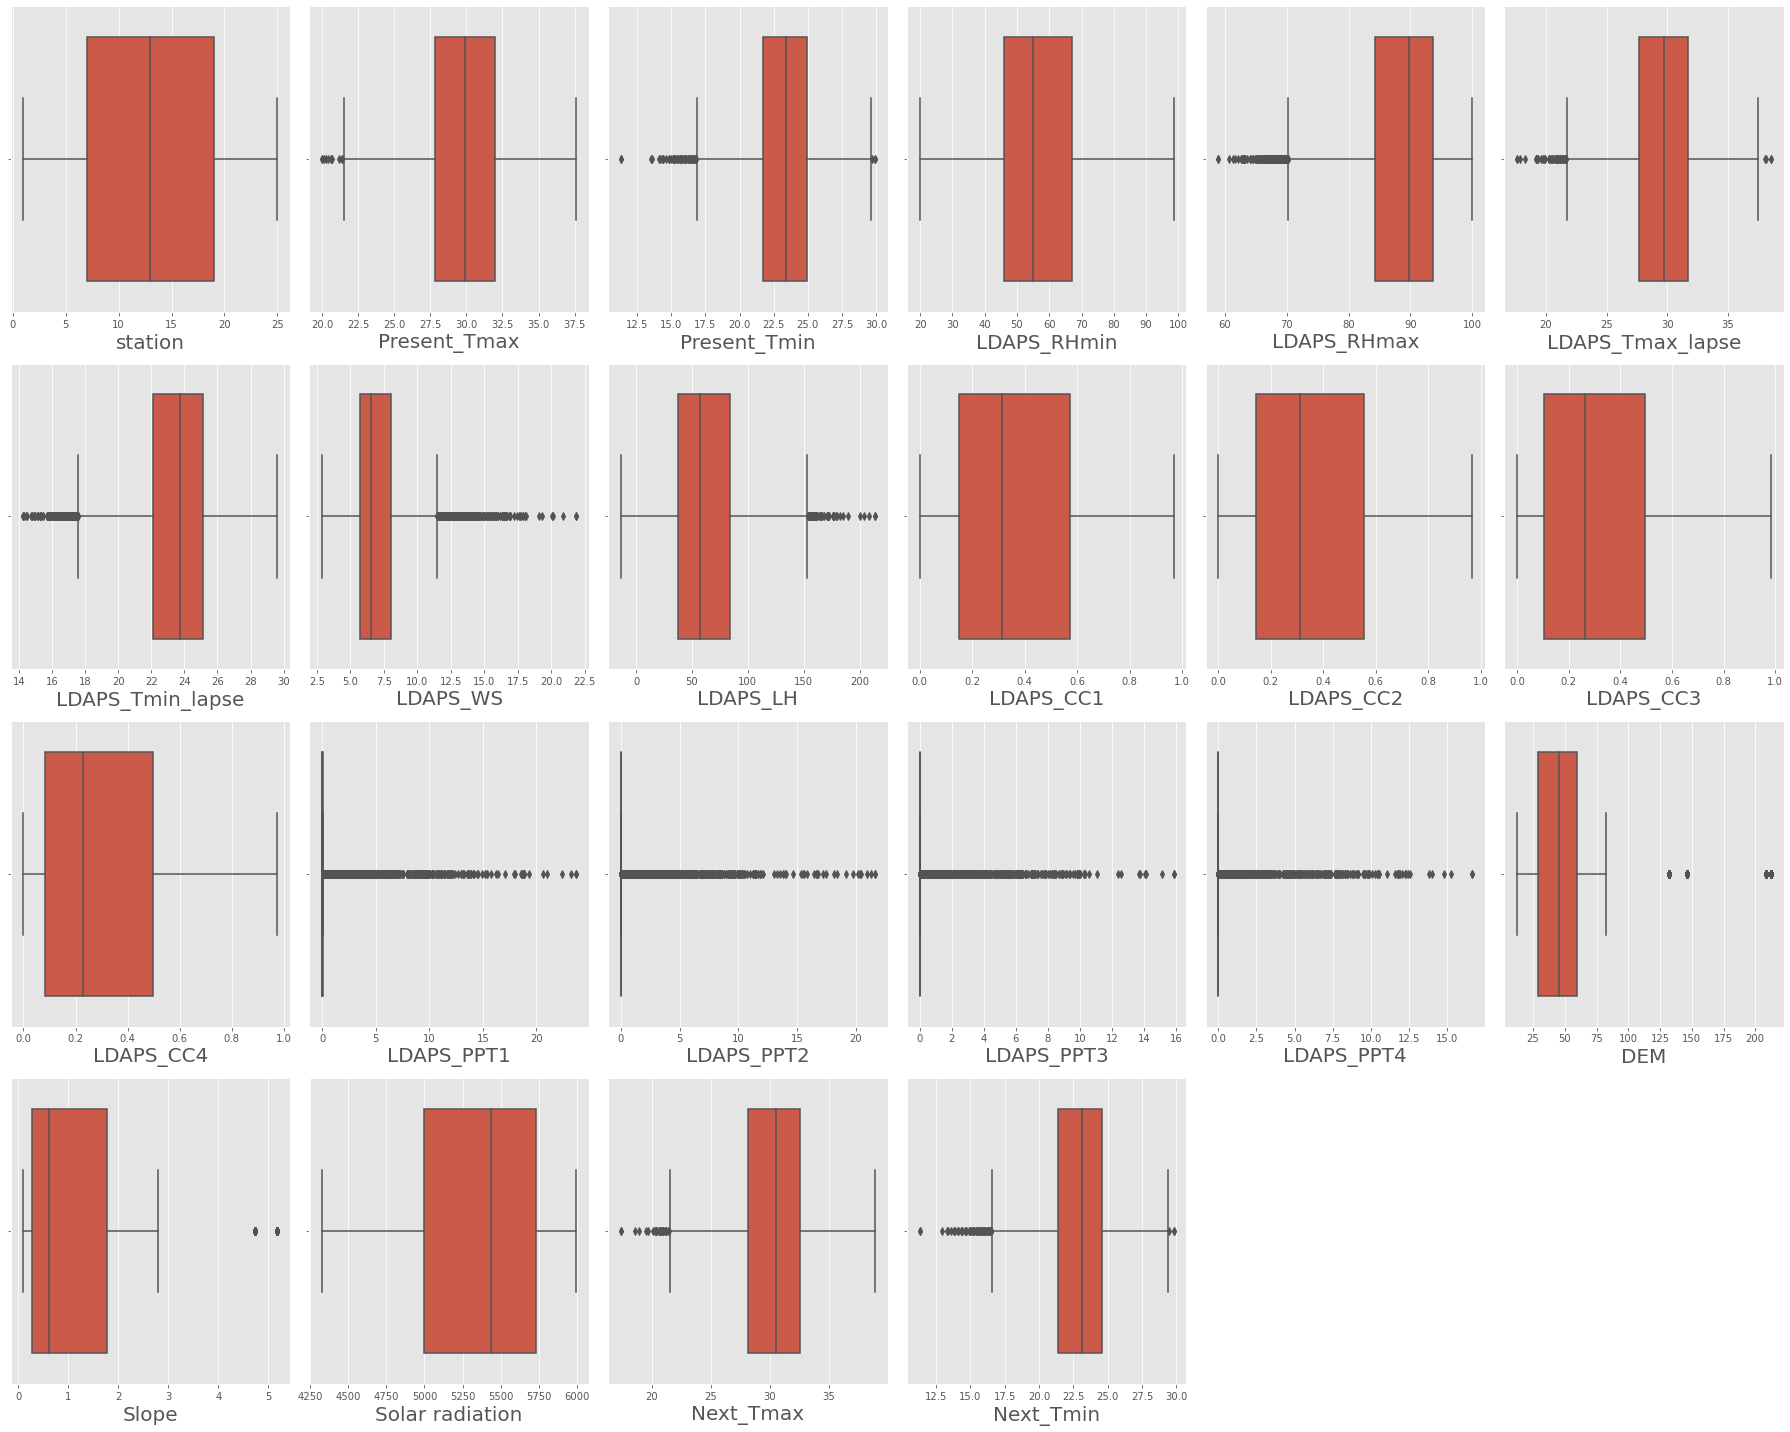

In [23]:
# lets check if there are any outliers in the dataset
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df:
    if column != 'Date':
        if plotnumber <=24:
            ax = plt.subplot(4,6,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize = 20)
        plotnumber+=1
plt.tight_layout()

In [24]:
# from the plots we can observe many columns have outliers, we will remove these outliers using zscore method
# Much outliers are observed in columns representing precipitation but we will not remove outliers from these column,because it may be its property which will give good results with these values

In [25]:
# lets check for skewness
df.skew()

station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [26]:
# lets remove the outliers by applying zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','DEM','Slope']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [27]:
# We can see that we have reduced skewness from many columns.

In [28]:
#lets convert data in column 'Date' into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))

<ipython-input-28-d49c1a90d3e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))


In [33]:
# lets divide the dataset into X and y
x = df.drop(['Next_Tmax','Next_Tmin'], axis=1)
y = df[['Next_Tmax','Next_Tmin']]

In [34]:
# Lets treat the skewness in the features
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.cbrt(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [35]:
# lets check for skewness again
x.skew()

index               0.000021
station             0.004649
Date                0.011548
Present_Tmax       -0.227490
Present_Tmin       -0.217935
LDAPS_RHmin         0.284346
LDAPS_RHmax        -0.755434
LDAPS_Tmax_lapse   -0.096644
LDAPS_Tmin_lapse   -0.381931
LDAPS_WS            0.576039
LDAPS_LH           -0.312649
LDAPS_CC1           0.487257
LDAPS_CC2           0.473759
LDAPS_CC3           0.191622
LDAPS_CC4          -0.454967
LDAPS_PPT1          1.989819
LDAPS_PPT2          2.317437
LDAPS_PPT3          2.637855
LDAPS_PPT4          2.956772
DEM                 0.943008
Slope               0.626847
Solar radiation    -0.501098
dtype: float64

In [36]:
# Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X,columns = x.columns)

In [37]:
# lets find our best random_state for splitting the data into train and test
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.7916898080976225 on Random State 2


In [38]:
# lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.25,random_state = 2)

In [43]:
# Model with Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

r2score = r2_score(y_test,pred_lr)*100

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(lr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

MAE : 0.9802756086454445
RMSE : 1.3119063020373418
------------------------------
Training r2 Score : 78.23570211401876 %
Testing r2 Score: 77.49302099847787 %
------------------------------

Cross validation score : 66.47168560424842

Accuracy Score - Cross Validation Score : 11.021335394229453


In [44]:
# Model with Decesion Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

r2score = r2_score(y_test,pred_dt)*100

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(dt, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

MAE : 0.9617316942811316
RMSE : 1.3305781706858566
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 75.4144848110202 %
------------------------------

Cross validation score : 26.420794701468008

Accuracy Score - Cross Validation Score : 48.99369010955219


In [45]:
# Model with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

r2score = r2_score(y_test,pred_rf)*100

#evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(rf, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

MAE : 0.6488174772848747
RMSE : 0.8664146008441077
------------------------------
Training r2 Score : 98.48998558088513 %
Testing r2 Score: 89.7431294991458 %
------------------------------

Cross validation score : 64.61255574114769

Accuracy Score - Cross Validation Score : 25.130573757998107


In [46]:
# Model with K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

r2score = r2_score(y_test,pred_knr)*100

#evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(knr, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

MAE : 0.7541795831106355
RMSE : 1.0609709357769117
------------------------------
Training r2 Score : 89.24830201213655 %
Testing r2 Score: 83.78909185865237 %
------------------------------

Cross validation score : -61.77853856809492

Accuracy Score - Cross Validation Score : 145.5676304267473


In [49]:
# lets check with Extra Trees regressor model
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_train)
pred_ext = ext.predict(x_test)

r2score = r2_score(y_test,pred_ext)*100

#evaluation
mse = mean_squared_error(y_test,pred_ext)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_ext)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score:", r2score,"%")
print('------------------------------')

#cross validation score
scores = cross_val_score(ext, x, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = r2score - scores
print("\nAccuracy Score - Cross Validation Score :", result)

MAE : 0.5905847140566542
RMSE : 0.7816989791220458
------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 91.58000787097784 %
------------------------------

Cross validation score : 66.08134029313763

Accuracy Score - Cross Validation Score : 25.49866757784021


In [50]:
# lets select different parameters for tuning
grid_params = {
                'max_depth': [8,9,10,12,15,20],
                'n_estimators':[500,700,1000,1200],
                'min_samples_split': [2,3]
                }

In [51]:
# train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(ExtraTreesRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [8, 9, 10, 12, 15, 20],
                         'min_samples_split': [2, 3],
                         'n_estimators': [500, 700, 1000, 1200]})

In [52]:
# lets check results of our final model with best parameters
model_1 = ExtraTreesRegressor(max_depth = 20, n_estimators = 500, min_samples_split = 2)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_train)
pred = model_1.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print('MAE : ' ,mse )
print("RMSE :", rmse)

# r2 score
print("\nTraining r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"\nTesting r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 0.586213462560714
MAE :  0.6074310704571183
RMSE : 0.7793786438292483

Training r2 Score : 99.98848760406571 %

Testing r2 Score: 91.63718576456083%


In [54]:
import joblib
joblib.dump(y_pred , 'model')

['model']